# Comparing models
<hr>

Try build a model from a simple, improve on it then compare the models.

- <a href="#model_1">model_1</a>: a simple model
- <a href="#model_2">model_2</a>: 2 layers, 100 epochs 
- <a href="#model_3">model_3</a>: 2 layers, adam optimizer, lr=0.01 
- <a href="#model_4">model_4</a>: 2 layers, adam optimizer, lr=0.01, 20 neurons 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
X = tf.range(-100, 100, 4)
y = X + 10

X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96])>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [3]:
# split into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

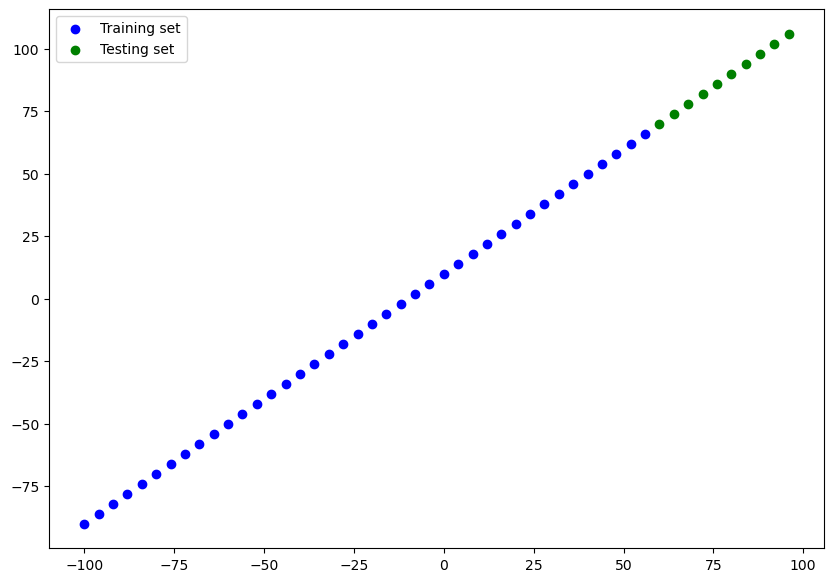

In [4]:
# plot the splited sets
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label="Training set")
plt.scatter(X_test, y_test, c='g', label="Testing set")
plt.legend()

<div id="model_1"></div>

## Model 1

In [5]:
tf.random.set_seed(42)

# 1. build the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. compile model
model_1.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae']
               )

# 3. fit model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 48.7883 - mae: 48.7883
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 16.6603 - mae: 16.6603
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 15.7188 - mae: 15.7188
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 8.2676 - mae: 8.2676
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.5867 - mae: 10.5867
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.8007 - mae: 9.8007
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.8816 - mae: 8.8816
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0816 - mae: 9.0816
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 19.5090 - mae: 19.5090
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.5438 - mae: 10.5438
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 8ms/step - loss: 10.6587 - mae: 10.6587
Epoch 89/100
2/2 [==============================] - 0s 6ms/step - loss: 7.2751 - mae: 7.2751
Epoch 90/100
2/2 [==============================] - 0s 6ms/step - loss: 12.8000 - mae: 12.8000
Epoch 91/100
2/2 [==============================] - 0s 5ms/step - loss: 7.4827 - mae: 7.4827
Epoch 92/100
2/2 [==============================] - 0s 4ms/step - loss: 6.7614 - mae: 6.7614
Epoch 93/100
2/2 [==============================] - 0s 5ms/step - loss: 11.9506 - mae: 11.9506
Epoch 94/100
2/2 [==============================] - 0s 6ms/step - loss: 8.8845 - mae: 8.8845
Epoch 95/100
2/2 [==============================] - 0s 5ms/step - loss: 7.7258 - mae: 7.7258
Epoch 96/100
2/2 [==============================] - 0s 5ms/step - loss: 6.7576 - mae: 6.7576
Epoch 97/100
2/2 [==============================] - 0s 5ms/step - loss: 8.6349 - mae: 8.6349
Epoch 98/100
2/2 [==============================] - 0s 3ms/step - loss: 9.403

In [6]:
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 [==============================] - 0s 79ms/step


array([[56.522926],
       [60.20533 ],
       [63.887733],
       [67.57014 ],
       [71.25254 ],
       [74.934944],
       [78.61735 ],
       [82.29975 ],
       [85.982155],
       [89.66456 ]], dtype=float32)

In [7]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [12]:
def plot_predictions(X_train,y_train,X_test,y_test,y_pred):
    """
    plot training data, test data and compares prediction to ground truth
    """
    plt.figure(figsize=(10,7))
    # plot training data in blue
    plt.scatter(X_train, y_train, c="b", label="Training data")
    # plot testing data in green
    plt.scatter(X_test, y_test, c="g", label="Testing data")
    # plot model prediction
    plt.scatter(y_test, y_pred, c="r", label="Prediction")
    # show legend
    plt.legend();

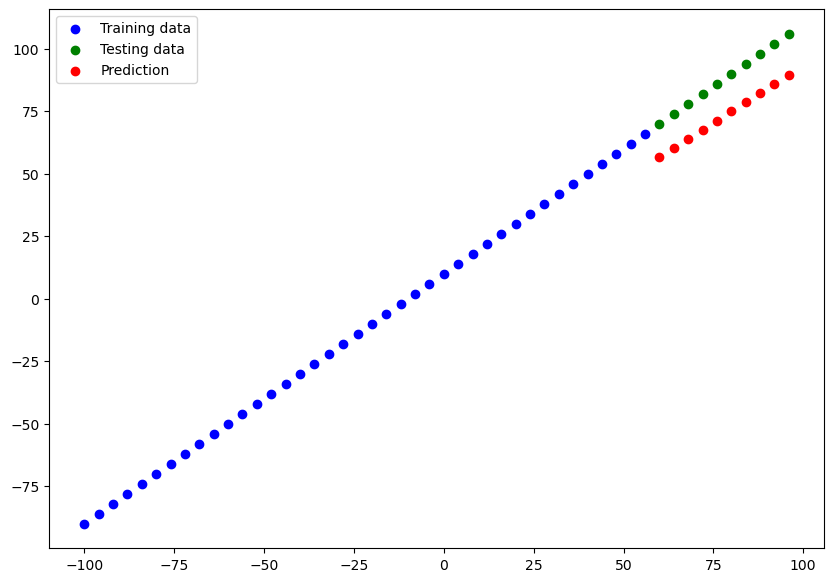

In [42]:
# Visualize the prediction
# visualize using a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred_1):
    """
    plot training data, test data and compares predictions to ground truth
    """
    plt.figure(figsize=(10,7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # plot model prediction
    plt.scatter(test_data, predictions, c="r", label="Prediction")
    # show legend
    plt.legend();
    
plot_predictions()

In [15]:
y_pred_1 = tf.squeeze(tf.constant(y_pred_1))
y_pred_1

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([56.522926, 60.20533 , 63.887733, 67.57014 , 71.25254 , 74.934944,
       78.61735 , 82.29975 , 85.982155, 89.66456 ], dtype=float32)>

In [16]:
mae_1 = tf.keras.losses.mae(y_test, y_pred_1)
mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=14.906258>

In [51]:
mse_1 = tf.keras.losses.mse(y_test, y_pred_1)
mse_1

<tf.Tensor: shape=(), dtype=float32, numpy=223.02866>

<div id="model_2"></div>

## Model 2

In [17]:
# improve the model, add another model

# 1. build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. compile model
model_2.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae']
               )

# 3. fit model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 40.1216 - mae: 40.1216
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 10.5997 - mae: 10.5997
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 25.2506 - mae: 25.2506
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 13.0101 - mae: 13.0101
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 16.4797 - mae: 16.4797
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1931 - mae: 11.1931
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 12.2115 - mae: 12.2115
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 10.9124 - mae: 10.9124
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 38.2012 - mae: 38.2012
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 25.7577 - mae: 25.7577
Epoch 11/100
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 5ms/step - loss: 19.3247 - mae: 19.3247
Epoch 88/100
2/2 [==============================] - 0s 5ms/step - loss: 29.2524 - mae: 29.2524
Epoch 89/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0771 - mae: 10.0771
Epoch 90/100
2/2 [==============================] - 0s 6ms/step - loss: 21.0636 - mae: 21.0636
Epoch 91/100
2/2 [==============================] - 0s 5ms/step - loss: 10.4486 - mae: 10.4486
Epoch 92/100
2/2 [==============================] - 0s 4ms/step - loss: 17.9891 - mae: 17.9891
Epoch 93/100
2/2 [==============================] - 0s 5ms/step - loss: 6.5352 - mae: 6.5352
Epoch 94/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1106 - mae: 11.1106
Epoch 95/100
2/2 [==============================] - 0s 5ms/step - loss: 24.4073 - mae: 24.4073
Epoch 96/100
2/2 [==============================] - 0s 4ms/step - loss: 10.7177 - mae: 10.7177
Epoch 97/100
2/2 [==============================] - 0s 5ms/step -

In [18]:
y_pred_2= model_2.predict(X_test)
y_pred_2

1/1 [==============================] - 0s 54ms/step


array([[ 76.5822  ],
       [ 81.56985 ],
       [ 86.5575  ],
       [ 91.54515 ],
       [ 96.5328  ],
       [101.52045 ],
       [106.508095],
       [111.49574 ],
       [116.4834  ],
       [121.47104 ]], dtype=float32)

In [19]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

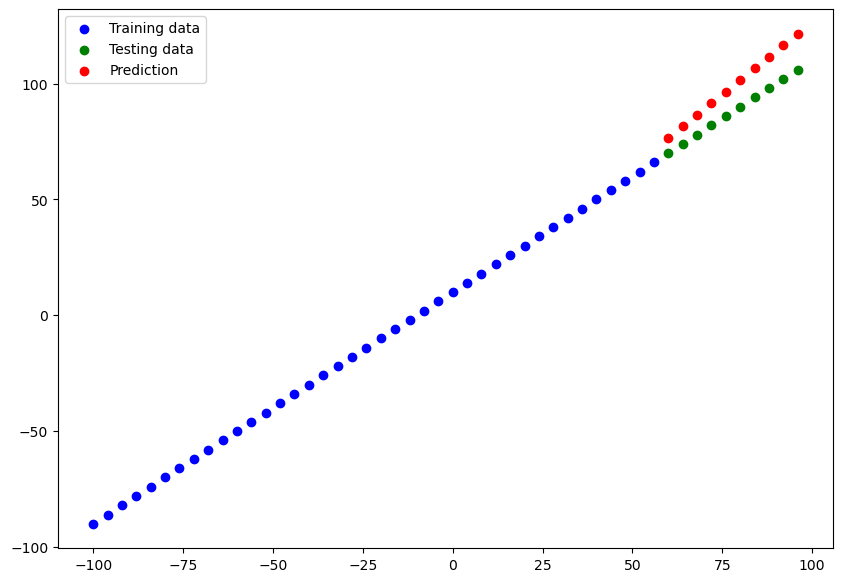

In [41]:
# Visualize the prediction
# visualize using a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred_2):
    """
    plot training data, test data and compares predictions to ground truth
    """
    plt.figure(figsize=(10,7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # plot model prediction
    plt.scatter(test_data, predictions, c="r", label="Prediction")
    # show legend
    plt.legend();
    
plot_predictions()

In [22]:
y_pred_2 = model_2.predict(X_test)
y_pred_2 = tf.squeeze(tf.constant(y_pred_2))
y_pred_2

1/1 [==============================] - 0s 24ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.5822  ,  81.56985 ,  86.5575  ,  91.54515 ,  96.5328  ,
       101.52045 , 106.508095, 111.49574 , 116.4834  , 121.47104 ],
      dtype=float32)>

In [23]:
mae_2 = tf.keras.losses.mae(y_test, y_pred_2)
mae_2

<tf.Tensor: shape=(), dtype=float32, numpy=11.026622>

In [50]:
mse_2 = tf.keras.losses.mse(y_test, y_pred_2)
mse_2

<tf.Tensor: shape=(), dtype=float32, numpy=129.63387>

<div id="model_3"></div>

## Model 3

In [24]:
# improve the model, add another model
tf.random.set_seed(42)

# 1. build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. compile model
model_3.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae']
               )

# 3. fit model
model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 32.0816 - mae: 32.0816
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 25.6920 - mae: 25.6920
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 19.5958 - mae: 19.5958
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 13.6257 - mae: 13.6257
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 8.8140 - mae: 8.8140
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2227 - mae: 9.2227
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0800 - mae: 11.0800
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.9354 - mae: 11.9354
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 11.7875 - mae: 11.7875
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0788 - mae: 11.0788
Epoch 11/100
2/2 [==============================] - 0s 5ms/step

2/2 [==============================] - 0s 5ms/step - loss: 0.3060 - mae: 0.3060
Epoch 90/100
2/2 [==============================] - 0s 5ms/step - loss: 0.2525 - mae: 0.2525
Epoch 91/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2170 - mae: 0.2170
Epoch 92/100
2/2 [==============================] - 0s 7ms/step - loss: 0.2262 - mae: 0.2262
Epoch 93/100
2/2 [==============================] - 0s 5ms/step - loss: 0.4588 - mae: 0.4588
Epoch 94/100
2/2 [==============================] - 0s 5ms/step - loss: 0.3356 - mae: 0.3356
Epoch 95/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2818 - mae: 0.2818
Epoch 96/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2169 - mae: 0.2169
Epoch 97/100
2/2 [==============================] - 0s 5ms/step - loss: 0.2985 - mae: 0.2985
Epoch 98/100
2/2 [==============================] - 0s 4ms/step - loss: 0.4402 - mae: 0.4402
Epoch 99/100
2/2 [==============================] - 0s 5ms/step - loss: 0.5221 - ma

In [25]:
y_pred_3 = model_3.predict(X_test)
y_pred_3

1/1 [==============================] - 0s 55ms/step


array([[ 69.17097 ],
       [ 73.11818 ],
       [ 77.06541 ],
       [ 81.01263 ],
       [ 84.95984 ],
       [ 88.90704 ],
       [ 92.85426 ],
       [ 96.801476],
       [100.74869 ],
       [104.695915]], dtype=float32)

In [26]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

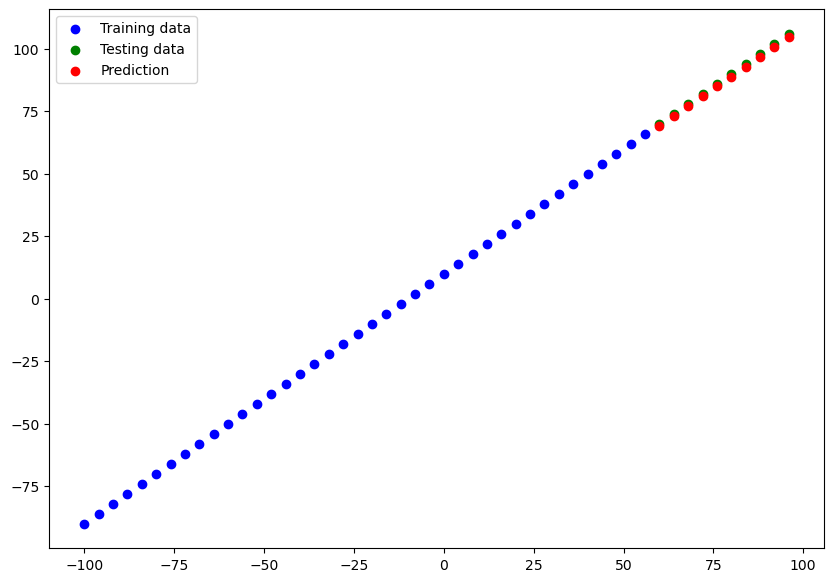

In [40]:
# Visualize the prediction
# visualize using a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred_3):
    """
    plot training data, test data and compares predictions to ground truth
    """
    plt.figure(figsize=(10,7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # plot model prediction
    plt.scatter(test_data, predictions, c="r", label="Prediction")
    # show legend
    plt.legend();
    
plot_predictions()

In [28]:
y_pred_3 = model_3.predict(X_test)
y_pred_3 = tf.squeeze(tf.constant(y_pred_3))
y_pred_3

1/1 [==============================] - 0s 23ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.17097 ,  73.11818 ,  77.06541 ,  81.01263 ,  84.95984 ,
        88.90704 ,  92.85426 ,  96.801476, 100.74869 , 104.695915],
      dtype=float32)>

In [29]:
mae_3 = tf.keras.losses.mae(y_test, y_pred_3)
mae_3

<tf.Tensor: shape=(), dtype=float32, numpy=1.0665596>

In [49]:
mse_3 = tf.keras.losses.mse(y_test, y_pred_3)
mse_3

<tf.Tensor: shape=(), dtype=float32, numpy=1.1605356>

<div id="model_4"></div>

## Model 4

In [36]:
# improve the model, add another model
tf.random.set_seed(42)

# 1. build the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. compile model
model_4.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae']
               )

# 3. fit model
model_4.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 29.3287 - mae: 29.3287
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 20.6124 - mae: 20.6124
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 12.6122 - mae: 12.6122
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 7.7517 - mae: 7.7517
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0089 - mae: 11.0089
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 13.1044 - mae: 13.1044
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 13.7117 - mae: 13.7117
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 13.1240 - mae: 13.1240
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 11.9640 - mae: 11.9640
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.0904 - mae: 10.0904
Epoch 11/100
2/2 [==============================] - 0s 5ms/s

Epoch 89/100
2/2 [==============================] - 0s 5ms/step - loss: 0.3884 - mae: 0.3884
Epoch 90/100
2/2 [==============================] - 0s 5ms/step - loss: 1.1106 - mae: 1.1106
Epoch 91/100
2/2 [==============================] - 0s 5ms/step - loss: 0.7493 - mae: 0.7493
Epoch 92/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2804 - mae: 0.2804
Epoch 93/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3508 - mae: 0.3508
Epoch 94/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3779 - mae: 0.3779
Epoch 95/100
2/2 [==============================] - 0s 5ms/step - loss: 0.2321 - mae: 0.2321
Epoch 96/100
2/2 [==============================] - 0s 5ms/step - loss: 0.4673 - mae: 0.4673
Epoch 97/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0319 - mae: 0.0319
Epoch 98/100
2/2 [==============================] - 0s 5ms/step - loss: 0.5153 - mae: 0.5153
Epoch 99/100
2/2 [==============================] - 0s 4ms/step - loss

In [37]:
# 4. predict
y_pred_4 = model_4.predict(X_test)
y_pred_4

1/1 [==============================] - 0s 82ms/step


array([[ 70.56745 ],
       [ 74.61038 ],
       [ 78.6533  ],
       [ 82.69623 ],
       [ 86.73915 ],
       [ 90.782074],
       [ 94.825   ],
       [ 98.86792 ],
       [102.91084 ],
       [106.95378 ]], dtype=float32)

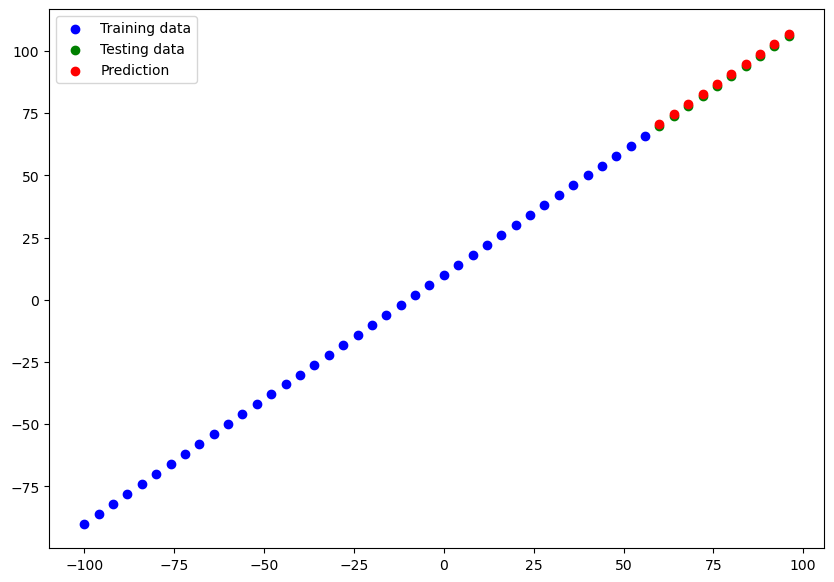

In [39]:
# Visualize the prediction
# visualize using a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred_4):
    """
    plot training data, test data and compares predictions to ground truth
    """
    plt.figure(figsize=(10,7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # plot model prediction
    plt.scatter(test_data, predictions, c="r", label="Prediction")
    # show legend
    plt.legend();
    
plot_predictions()

In [44]:
y_pred_4 = model_4.predict(X_test)
y_pred_4 = tf.squeeze(tf.constant(y_pred_4))
y_pred_4

1/1 [==============================] - 0s 23ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.56745 ,  74.61038 ,  78.6533  ,  82.69623 ,  86.73915 ,
        90.782074,  94.825   ,  98.86792 , 102.91084 , 106.95378 ],
      dtype=float32)>

In [45]:
mae_4 = tf.keras.losses.mae(y_test, y_pred_4)
mae_4

<tf.Tensor: shape=(), dtype=float32, numpy=0.7606125>

In [46]:
mse_4 = tf.keras.losses.mse(y_test, y_pred_4)
mse_4

<tf.Tensor: shape=(), dtype=float32, numpy=0.59373206>

## Comparing Models

In [43]:
import pandas as pd

In [52]:
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()],
                 ["model_4", mae_4.numpy(), mse_4.numpy()]]

all_results = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE"])
all_results

,Model,MAE,MSE
0,model_1,14.906258,223.028656
1,model_2,11.026622,129.633865
2,model_3,1.066560,1.160536
3,model_4,0.760612,0.593732


**Model 4 perform the best**

In [53]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 20)                40        
                                                                 
 dense_10 (Dense)            (None, 1)                 21        
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> One of the main goals is to minimize the time between your experiments. It takes a lot of trial and error. Remember the machine learning pratictioner's motto: `Experiment! Experiment!! Experiment!!!`

## Tracking your Experiments

One good habit in machine learning modelling is to track the results of your experiments. When doing so, it can be tedious if you're lots of experiments.

Luckily, there are tools to use to track models.
- **TensorBoard:** a component of tensorflow library to help track modelling experiments.
- **Weights & Biases:** a tool for tracking all kinds of machine learning experiments (plugged in TensorBoard).

## Saving a Model. Click <a href="06 - Saving Model.ipynb">here</a>